# BTO ヒステリシス曲線

BTO のヒステリシス曲線の測定データを処理するコード

まずはライブラリのインポートから

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

ファイル名と温度・電圧の対応

In [2]:
for i in range(-2, 3):
    print(i)

-2
-1
0
1
2


In [49]:
temp = []
volt = []
# 室温から120度までのデータ
for i in range(4):
    for j in range(17):
        if (i == 0):
            temp.append(26.9)
        elif (i ==  1):
            temp.append(60.0)
        elif (i == 2):
            temp.append(90.0)
        elif (i == 3):
            temp.append(120.0)
        volt.append((j+1)*10.0)
# 125度からのデータ
for i in range(69, 102):
    volt.append(170)
# 温度は手打ち
temp.append(125)
temp.append(130)
temp.append(132)
temp.append(135)
temp.append(137)

temp.append(140)
temp.append(145)
temp.append(150)
temp.append(155)
temp.append(160)

temp.append(165)
temp.append(170)

temp.append(170)
temp.append(165)

temp.append(160)
temp.append(155)
temp.append(150)
temp.append(145)
temp.append(140)

temp.append(137)
temp.append(135)
temp.append(132)
temp.append(130)
temp.append(125)

temp.append(120)
temp.append(115)
temp.append(110)

temp.append(105)
temp.append(100)
temp.append(95)
temp.append(90)
temp.append(85)

temp.append(80)

csv ファイルのインポート。
データフレームにした後、電圧だけを取り出して、x 軸に電場、y軸に電束密度にする。
BTO を入れたコンデンサのパラメータ、厚さを thin 面積を area としてる。

In [4]:
thin = 500 # マイクロメートル
area = 20 # 平方ミリメートル

csv からデータを読み取とり、data 変数に入れる

data[何番目のファイル][i][成分]

i = 0 時刻、 i = 1 電場, i = 2 分極、i = 3 電圧、 i = 4 温度

In [71]:
nfile = 101
data = np.zeros((nfile, 5, 10000))
for i in range(1, nfile+1):
    df = pd.read_csv(f"2024_10_04_BTO/ALL{i:04}.CSV", skiprows=24, usecols = [0,1,3])
    data[i-1][0][:] = df.iloc[:,0].values
    data[i-1][1][:] = df.iloc[:,1].values / thin * 100 # kV/cm
    data[i-1][2][:] = df.iloc[:,2].values / area * 10  # uC/cm^2
    data[i-1][3][:] = volt[i-1]
    data[i-1][4][:] = temp[i-1]

# 移動平均によるフィルターと平均からのずれの補正
window_size = 100
for i in range(nfile):
    Emean = np.mean(data[i][1][:])
    Pmean = np.mean(data[i][2][:])
    for j in range(0, 10000-window_size):
        data[i][1][j] = np.mean(data[i][1][j:j+window_size]) - Emean
        data[i][2][j] = np.mean(data[i][2][j:j+window_size]) - Pmean

In [52]:
from matplotlib.colors import Normalize

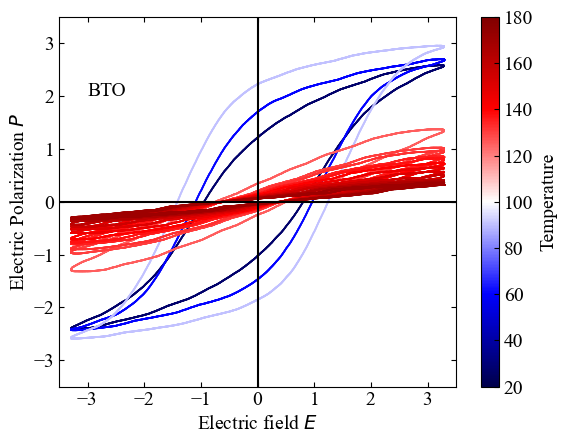

In [105]:
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] ='Times New Roman'
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xticks([-3,-2,-1,0,1,2,3])
plt.hlines([0],-3.5,3.5, "black")
plt.vlines([0],-3.5,3.5, "black")
plt.xlabel("Electric field $E$")
plt.ylabel("Electric Polarization $P$ ")
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.scatter(data[16][1][3000:7000],data[16][2][3000:7000], c=data[16][4][3000:7000], cmap="seismic", norm=Normalize(vmin=20, vmax=180),  s=0.1)
plt.scatter(data[33][1][3000:7000],data[33][2][3000:7000], c=data[33][4][3000:7000], cmap="seismic", norm=Normalize(vmin=20, vmax=180),  s=0.1)
plt.scatter(data[50][1][3000:7000],data[50][2][3000:7000], c=data[50][4][3000:7000], cmap="seismic", norm=Normalize(vmin=20, vmax=180),  s=0.1)
for i in range(68,81):
    plt.scatter(data[i][1][3000:7000],data[i][2][3000:7000], c=data[i][4][3000:7000], cmap="seismic", norm=Normalize(vmin=20, vmax=180),  s=0.1)
plt.colorbar(label = "Temperature")

plt.text(-3, 2, "BTO")

plt.show()


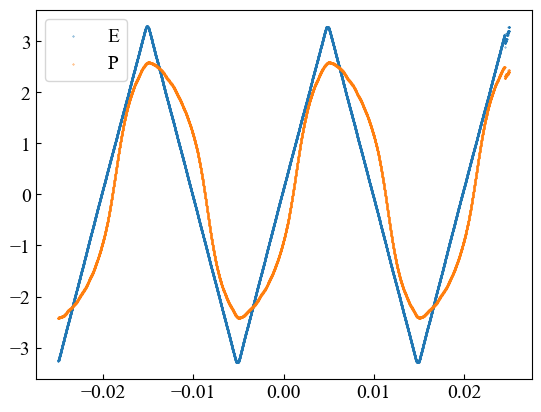

In [103]:
plt.scatter(data[16][0][:],data[16][1][:], s=0.1, label="E")
plt.scatter(data[16][0][:],data[16][2][:], s=0.1, label="P")
plt.legend()

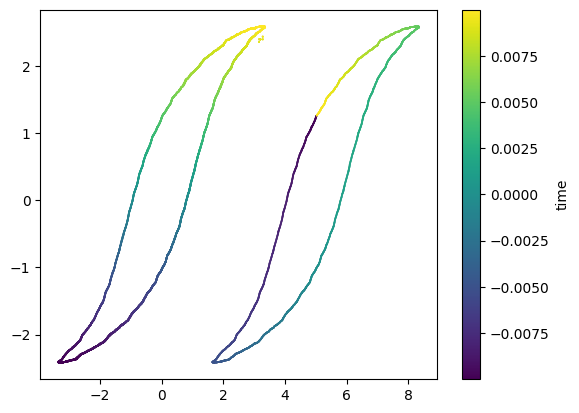

In [41]:
plt.scatter(data[16][1][:],data[16][2][:], c=data[16][2][:], cmap="viridis",  s=0.1, label = "all")
plt.scatter(data[16][1][3000:7000]+5.0,data[16][2][3000:7000], c=data[16][0][3000:7000], cmap="viridis", s=0.1, label = "part")
plt.colorbar(label = "time")
# plt.legend()